In [1]:
import ailabtools.common as cm
# cm.dark_theme_jupyter_lab()
cm.default_theme_jupyter_lab()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# cm.dark_theme_matplotlib()
cm.default_theme_matplotlib()

import random

import ailabtools.statistic as st

In [3]:
total = 10000
xs = ['data_{:02d}'.format(i) for i in range(total)]
ys = [random.randint(0, 3)*2 for _ in range(total-5000)]
ys.extend([random.randint(3, 9) for _ in range(2000)])
ys.extend([random.randint(0, 9) for _ in range(3000)])

Sample sum: 10000


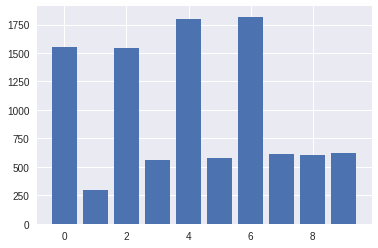

[1556, 298, 1540, 560, 1803, 577, 1819, 617, 605, 625]
(10, 'min:', 298, 'max:', 1819, 'std:', 567.88889758473, 'mean:', 1000.0, 'median:', 621.0)


In [4]:
data_dic, keys, nums = st.statistic_data(xs, ys, title='Sample')

Sample Train sum: 7997


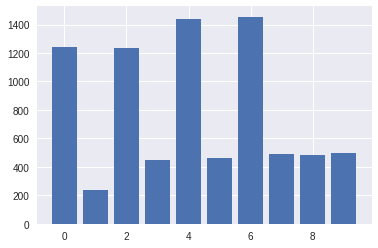

[1244, 238, 1232, 448, 1442, 461, 1455, 493, 484, 500]
(10, 'min:', 238, 'max:', 1455, 'std:', 454.2820819711031, 'mean:', 799.7, 'median:', 496.5)
Sample Val sum: 2003


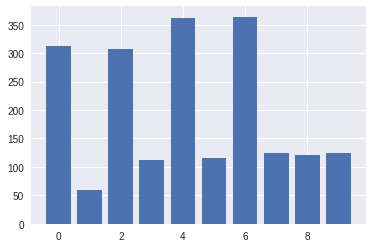

[312, 60, 308, 112, 361, 116, 364, 124, 121, 125]
(10, 'min:', 60, 'max:', 364, 'std:', 113.60726209182228, 'mean:', 200.3, 'median:', 124.5)


In [5]:
xs_train, ys_train, xs_val, ys_val = st.split_data(xs, ys, alpha=0.8)
data_dic_train, keys_train, nums_train = st.statistic_data(xs_train, ys_train, title='Sample Train')
data_dic_val, keys_val, nums_val = st.statistic_data(xs_val, ys_val, title='Sample Val')

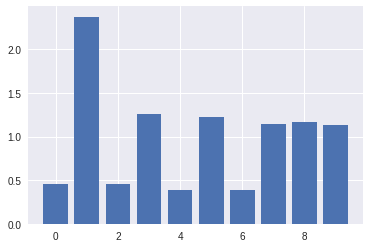

In [6]:
weights_dict = st.get_weight_dict(xs_train, ys_train, multiply=10)
ks = list(weights_dict.keys())
plt.bar(ks, [weights_dict[k] for k in ks])
plt.show()

before sum: 7997


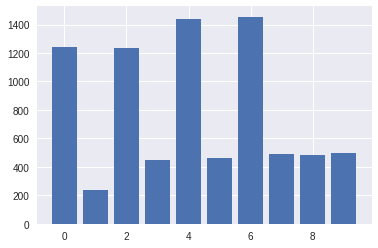

[1244, 238, 1232, 448, 1442, 461, 1455, 493, 484, 500]
(10, 'min:', 238, 'max:', 1455, 'std:', 454.2820819711031, 'mean:', 799.7, 'median:', 496.5)
after sum: 13890


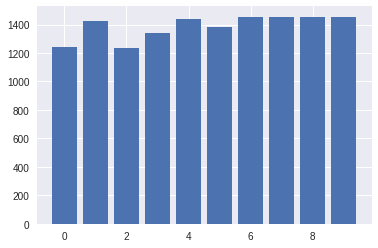

[1244, 1428, 1232, 1344, 1442, 1383, 1455, 1455, 1452, 1455]
(10, 'min:', 1232, 'max:', 1455, 'std:', 83.12761274089374, 'mean:', 1389.0, 'median:', 1435.0)


In [7]:
xs_train_up, ys_train_up = st.upsample_data(xs_train, ys_train)

Sample 0 sum: 3427


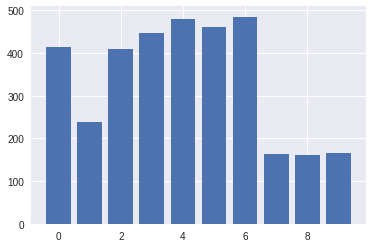

[414, 238, 410, 448, 480, 461, 485, 164, 161, 166]
(10, 'min:', 161, 'max:', 485, 'std:', 134.51025983173182, 'mean:', 342.7, 'median:', 412.0)
Sample 1 sum: 3427


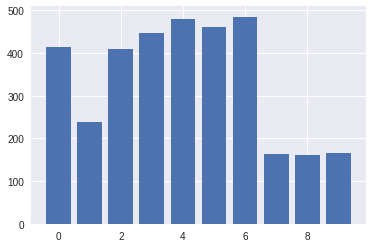

[414, 238, 410, 448, 480, 461, 485, 164, 161, 166]
(10, 'min:', 161, 'max:', 485, 'std:', 134.51025983173182, 'mean:', 342.7, 'median:', 412.0)
Sample 2 sum: 3437


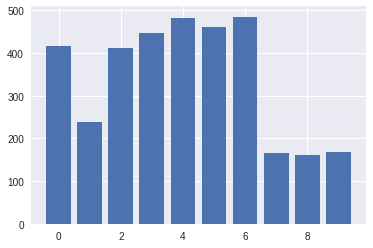

[416, 238, 412, 448, 482, 461, 485, 165, 162, 168]
(10, 'min:', 162, 'max:', 485, 'std:', 134.3927453399178, 'mean:', 343.7, 'median:', 414.0)


In [8]:
l_d = st.divide_data(xs_train, ys_train, chunk_num=3, keeps=[1,3,5])
for i, d in enumerate(l_d):
    x, y = st.convert_dict_to_pair(d)
    _,_,_ = st.statistic_data(x, y, title='Sample ' + str(i))